In [28]:
import pandas as pd
import pysubgroup as ps
from os import path
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [18]:
data = pd.read_csv("features_with_topic.csv")
data.index = data["Unnamed: 0"]
data = data.drop(columns="Unnamed: 0")
with open("coherence_result_old.pkl", "rb") as f:
    lda_dict = pickle.load(f)

In [26]:
coherence_small = {key: lda_dict[key]['coherence_score'] for key in lda_dict.keys()}

In [31]:
with open("coherence_result_small.json", "wb") as f:
    json.dump(coherence_small, f)

TypeError: a bytes-like object is required, not 'str'

In [8]:
data.head()

,max_degree,average_degree,density,longest_path,degree_centralization,betweenness_centralization,003,012,021D,021U,021C,030T,dominant_topic
Unnamed: 0,,,,,,,,,,,,,
86399837,0.180272,2.095238,0.003575,0.037415,0.174926,0.000978,13960.023810,292.734694,0.037415,5.595238,0.921769,0.020408,9
231361755,0.242038,2.133758,0.003409,0.073248,0.237507,0.002606,15953.592357,311.971338,0.092357,9.203822,1.117834,0.022293,8
158882215,0.455414,2.089172,0.003337,0.028662,0.453080,0.000718,15989.805732,246.512739,0.057325,39.006369,0.582803,0.035032,9
158306160,0.281967,2.118033,0.003484,0.147541,0.277749,0.009901,15044.295082,294.554098,0.049180,12.226230,0.849180,0.026230,5
121397398,0.180380,2.139241,0.003396,0.066456,0.175270,0.003018,16155.645570,322.860759,0.075949,5.449367,0.955696,0.012658,9


In [19]:
coherence_values = [entry['coherence_score'] for entry in lda_dict.values()]

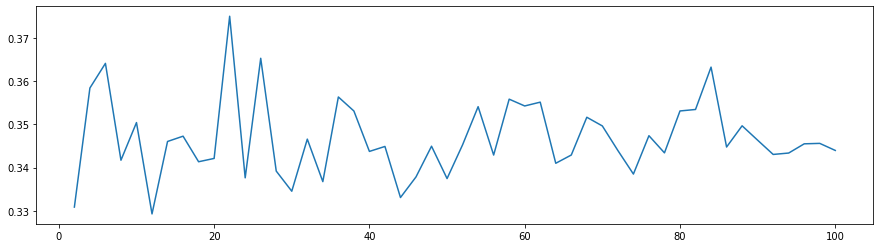

In [24]:
plt.figure(figsize=(15,4))
sns.lineplot(x=list(lda_dict.keys()), y=coherence_values)

In [14]:
result_dict = {}
for topic_no in data.dominant_topic.unique():
    ps_target = ps.NominalTarget('dominant_topic', topic_no)
    ps_search_space = ps.create_selectors(data, ignore=['dominant_topic'])
    ps_task = ps.SubgroupDiscoveryTask(data, ps_target, ps_search_space, qf=ps.StandardQF(0.5))
    result_dict[topic_no] = ps.BeamSearch().execute(ps_task)

Mit alpha = 1

In [13]:
ps.utils.results_as_df(data, result_dict[0])[["size_sg", "subgroup", "target_share_sg", "target_share_dataset", "lift" ]]

,size_sg,subgroup,target_share_sg,target_share_dataset,lift
0,1372.0,021C>=1.06,0.081633,0.047688,1.711789
1,450.0,012>=319.82 AND 021U<7.29 AND 021C>=1.06,0.117778,0.047688,2.469732
2,619.0,021C>=1.06 AND 021U<7.29,0.098546,0.047688,2.066453
3,607.0,max_degree<0.21 AND 021C>=1.06,0.098847,0.047688,2.072760
4,589.0,max_degree<0.21 AND 021C>=1.06 AND 021U<7.29,0.100170,0.047688,2.100502
5,590.0,021C>=1.06 AND degree_centralization<0.20 AND ...,0.100000,0.047688,2.096942
6,606.0,021C>=1.06 AND degree_centralization<0.20 AND ...,0.097360,0.047688,2.041577
7,774.0,021C>=1.06 AND 012>=319.82,0.086563,0.047688,1.815182
8,607.0,021C>=1.06 AND degree_centralization<0.20,0.097199,0.047688,2.038214
9,449.0,max_degree<0.21 AND 021C>=1.06 AND 012>=319.82,0.113586,0.047688,2.381827


Mit alpha = 0.5

In [16]:
ps.utils.results_as_df(data, result_dict[1])[["size_sg", "subgroup", "target_share_sg", "target_share_dataset", "lift" ]]


,size_sg,subgroup,target_share_sg,target_share_dataset,lift
0,286.0,021U<7.29 AND 021C: [0.82:0.95[,0.153846,0.050751,3.031388
1,81.0,003<15131.43 AND 021U<7.29 AND 021C: [0.82:0.95[,0.222222,0.050751,4.378672
2,282.0,021C: [0.82:0.95[ AND degree_centralization<0.20,0.138298,0.050751,2.725024
3,282.0,max_degree<0.21 AND 021C: [0.82:0.95[,0.138298,0.050751,2.725024
4,282.0,max_degree<0.21 AND 021C: [0.82:0.95[ AND degr...,0.138298,0.050751,2.725024
5,256.0,021U<7.29 AND 021C: [0.82:0.95[ AND degree_cen...,0.140625,0.050751,2.770878
6,256.0,max_degree<0.21 AND 021C: [0.82:0.95[ AND 021U...,0.140625,0.050751,2.770878
7,261.0,021C: [0.82:0.95[ AND 030T: [0.01:0.02[,0.137931,0.050751,2.717796
8,92.0,betweenness_centralization: [0.00:0.00[ AND 02...,0.195652,0.050751,3.855135
9,92.0,betweenness_centralization: [0.00:0.00[ AND 02...,0.195652,0.050751,3.855135
